In [7]:
import array
width, height = 277, 208
my_array = array.array('B', [0] * 8)
image = array.array('B') #, [0, 0, 0] * width * height)
print("my_array has", len(image), "elements")
print("The size of one element of my_array is", image.itemsize, "bytes")
#print("my_array =", my_array)
print(image)


my_array has 0 elements
The size of one element of my_array is 1 bytes
array('B')


In [8]:
with open("img/BrainMRI.ppm", "rb") as bppm:
    #image.fromstring(bppm)
    data = bppm.read()
    datamono = data[61:]
    datamono = bytes([pix for pix in datamono[::3]])
    image.frombytes(datamono)
    print(datamono[:21])
    lenbpm = len(image)
    print(lenbpm, lenbpm//(width*1))
    print(image)
    

b'\x15\x18\x17\x19\x1e \x1f!#%*,0-+(%$$!!'
57616 208
array('B', [21, 24, 23, 25, 30, 32, 31, 33, 35, 37, 42, 44, 48, 45, 43, 40, 37, 36, 36, 33, 33, 30, 29, 27, 14, 11, 8, 5, 3, 3, 3, 3, 10, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 31, 73, 100, 129, 148, 156, 149, 144, 140, 119, 94, 68, 49, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8, 10, 7, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 33, 47, 56, 60, 61, 56, 56, 46, 43, 40, 32, 19, 16, 17, 14, 14, 15, 12, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 16, 35, 54, 67, 76, 84, 93, 90, 85, 87, 95, 92, 78, 54, 34, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 53, 71, 88, 97, 103, 107, 99, 87, 52, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 40, 90, 121, 193, 249, 255, 

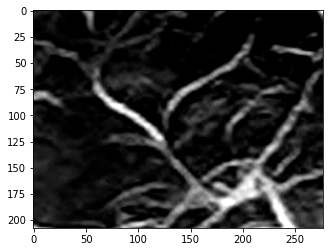

In [9]:
import matplotlib.pyplot as plt
img_ppm = [image[a*width: a*width+width] for a in range(height)]
imgplot = plt.imshow(img_ppm, cmap='gray', vmin=0, vmax=255)
plt.show()


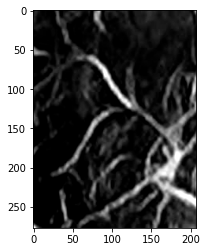

In [10]:
rimg_ppm = zip(*img_ppm)
rimg_ppm = [list(a) for a in rimg_ppm]

imgplot = plt.imshow(rimg_ppm, cmap='gray', vmin=0, vmax=255)
plt.show()

34737


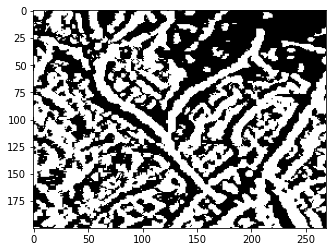

In [11]:
sinus_map = [array.array('B', [255] * width) for _ in range(height)]
insinus = [
    (cx, cy) for cy, line in enumerate(img_ppm[1:-1])
    for cx, dot in enumerate( line[1:-1])
    if dot >= max([line[cx-1],line[cx+1]])
]
cover = 4
sinus_map = [
    [0 if 
     #(dot >= max(list(line)[cx-cover:cx+cover]))
     dot >= max(line.tolist()[cx:cx+4])
     else 255  for cx, dot in enumerate( line[cover:-cover])]
    for cy, line in enumerate(img_ppm[cover:-cover])
    
]
print(len(insinus))
#print(sinus_map)
imgplot = plt.imshow(sinus_map, cmap='gray', vmin=0, vmax=255)
plt.show()